![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 1: Interpolação, Regressão e Derivadas

Vimos que, ao usar interpolação polinomial com pontos igualmente espaçados,
a função fica bem melhor aproximada no centro do intervalo do que nas extremidades.
Nesta parte, veremos como estas técnicas poderiam ser usadas para aproximar as derivadas de uma função.

## Questão 1: Funções básicas

In [2]:
def interp(xs, ys):
    "Retorna os coeficientes do polinomio interpolador para os pontos  (xs, ys)."
    assert(len(xs) == len(ys))
    
    Vandermonde = []
    
    for x in xs:
        vetor = []
        for i in range(len(xs)):
            vetor.append(x**i)
        Vandermonde.append(vetor)

    return np.linalg.solve(Vandermonde,ys)

In [44]:
interp(np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0]), np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0]))

array([ 0.        ,  0.63333333,  0.625     , -0.575     ,  0.125     ,
       -0.00833333])

In [3]:
def regress(xs, ys, d):
    "Retorna os coeficientes do polinomio de grau  d  que aproxima, em mínimos quadrados, os pontos  (xs, ys)."
    
    # Retorna a matriz do sistema linear
    Matriz_resposta = []

    for xs in xs:
        linha = []
        for i in range(d+1):
           linha.append(xs**i)
        Matriz_resposta.append(linha)
    
    Matriz_resposta = np.array(Matriz_resposta)

    # Calcula os parâmetros para os dados (t_i, y_i), resolvendo o sistema linear
    M = Matriz_resposta
    ProdDireito = (M.T @ (M))
    ProdEsquerdo = M.T @ ys

    return np.linalg.solve(ProdDireito, ProdEsquerdo)

In [9]:
def polyval(coefs, t):
    "Calcula o valor do polinômio com coeficietes  coefs  (dados em ordem crescente) nos pontos t."    
    """ Método de Horner. Dados os coeficientes em ordem inversa, [a_n, ... a_1, a_0],
        retorna uma função que calcula o polinômio correspondente. """
    coefs = coefs[::-1]
    t = np.array(t)
    valor = coefs[0]

    for a in coefs[1:]:
        valor = valor*t + a
    
    return valor
    

In [10]:
assert np.allclose(polyval([1,2], [0,1,2,3]), [1,3,5,7])

In [11]:
assert np.allclose(polyval([1,0,1,2], [0,1,-1,1/2,3]), [1, 4, 0, 3/2, 64])

In [21]:
def derivada(coefs):
    "Retorna a lista dos coeficientes do polinômio que é a derivada do polinômio dados pelos coeficientes coefs."
    Dcoefs = []
    
    for coef, i in enumerate(coefs):
        Dcoefs.append(coef*(i))

    return Dcoefs[1:]

In [23]:
assert np.allclose(derivada([1,2,3,4,5]), [2,6,12,20])

[0, 2, 6, 12, 20]


## Questão 2: Erros de interpolação

Usando pontos igualmente espaçados,
podemos calular um polinômio $p_d$ de grau $d$ que interpola uma função $f$.
Ao derivar este polinômio, obtemos uma aproximação da derivada $f'$.

Vamos estudar como este método funciona para a função seno.

Faça, lado a lado (usando `subplots`),
o gráfico do erro cometido pelo polinômio de interpolação de grau 2 para a função seno no intervalo [0,3],
e o erro resultante de usar a derivada deste polinômio para aproximar a derivada.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.0, 1.2829533127854502, -0.8239422067325519]


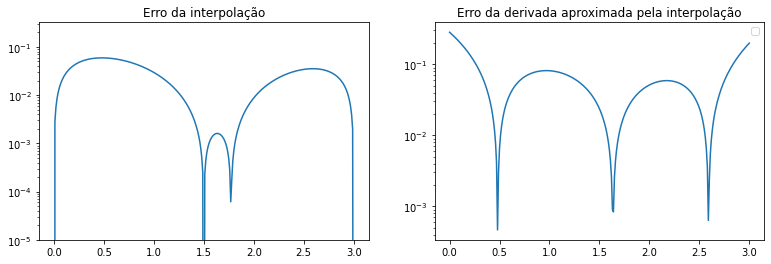

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

# YOUR CODE HERE
xs = np.linspace(0, 3, 3)
ys = np.sin(xs)

CoefsInterpola = interp(xs, ys)
CoefsInterpolaDerivado = derivada(CoefsInterpola)

ts = np.arange(0, 3.01, 0.01)

ValorSen = np.sin(ts)
ValorInter = polyval(CoefsInterpola,ts)
ax1.semilogy(ts, abs(ValorSen - ValorInter))
ax1.set_title('Erro da interpolação')
ax1.set_ylim(10e-6)

ValorCos = np.cos(ts)
ValorInterDer = polyval(CoefsInterpolaDerivado,ts)
ax2.semilogy(ts, abs(ValorCos - ValorInterDer))
ax2.set_title('Erro da derivada aproximada pela interpolação')

plt.legend()

fig = plt.gcf()

In [28]:
for ax in fig.axes:
    assert len(ax.get_title()) >= 10

Quem tem mais erro: a aproximação da função ou da derivada?
(Talvez você tenha que ajustar `ylim` para ver melhor o gráfico)

Ao que parece, no geral, a grandeza dos erros são parecidos, mas a derivada possui um pouco mais de erro, nos pontos de fronteira o erro da derivada aumenta consideravelmente. E nos pontos de interpolação o erro da derivada não vai a 0, como se esperaria.

## Questão 3: mais graus!

Faça também para os graus 4, 6 e 8.

[0.0, 0.9816280099334677, 0.11914348049932144, -0.7115361575265178, 0.1513044806790705]
[0.0, 1.000537287822975, -0.005749091910100448, -0.48194642711250146, -0.0259818757724975, 0.06126911383254238, -0.007807811075469773]
[0.0, 0.9999909123199723, 0.00013954125911396097, -0.5006524253489959, 0.001470998522485648, 0.039787252212427564, 0.0014527481311664816, -0.0020754824075094637, 0.00018884205656110136]


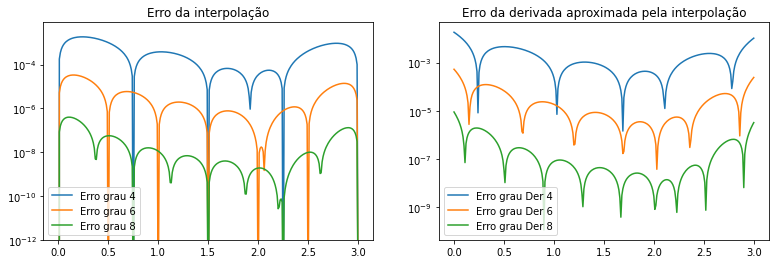

In [59]:
# YOUR CODE HERE
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

# YOUR CODE HERE
grau = [4, 6, 8]
for i in grau:
    xs = np.linspace(0, 3, i+1)
    ys = np.sin(xs)

    CoefsInterpola = interp(xs, ys)
    CoefsInterpolaDerivado = derivada(CoefsInterpola)

    ts = np.arange(0, 3.01, 0.01)

    ValorSen = np.sin(ts)
    ValorInter = polyval(CoefsInterpola,ts)
    ax1.semilogy(ts, abs(ValorSen - ValorInter), label=f'Erro grau {i}')
    ax1.set_title('Erro da interpolação')
    ax1.legend()
    ax1.set_ylim(10e-13)

    ValorCos = np.cos(ts)
    ValorInterDer = polyval(CoefsInterpolaDerivado,ts)
    ax2.semilogy(ts, abs(ValorCos - ValorInterDer), label=f'Erro grau Der {i}')
    ax2.set_title('Erro da derivada aproximada pela interpolação')
    ax2.legend()
    

fig = plt.gcf()

In [45]:
assert len(fig.axes) == 2
for ax in fig.axes:
    assert len(ax.lines) == 3

In [49]:
for ax in fig.axes:
    assert len(ax.get_title()) >= 10
    assert len(ax.get_legend().texts) == 3

In [50]:
fig = None

O erro é maior para aproximar a função ou a derivada?  De quanto?

Os erros da derivada são claramente um pouco maior, principalmente quando vai se aproximando da fronteira do intervalo. Interessante tbm que o erro da derivada apresenta ser mais estável do que o erro da função

O erro da aproximação da derivada é maior no centro ou nas extremidades?  Isso é esperado?

É maior nas extremidades. Isso era esperado tendo em vista que o polinômio interpolador também piora indo pras extremidades. 
O ponto interessante são os pontos onde foi feita a interpolação, que claramente no polinomio em si o erro é 0, mas na sua derivada o erro segue o padrão normalmente, e quando se trata das extremidades interpoladas ele piora absurdamente.

### Outros graus

Faça agora com graus 3, 5, 7 e 9.

[0.0, 1.207506816871789, -0.7112852247966226, -0.031179658996744297]
[0.0, 0.9884512210934401, 0.08639977087362438, -0.6713420446760261, 0.1331448514449943, 0.0027337970405624887]
[0.0, 1.0003056171638536, -0.0036725182761735463, -0.4872340298080889, -0.020060717293552396, 0.05798033181555994, -0.006919238216792322, -9.31137651227067e-05]
[0.0, 0.9999952352974163, 8.059530265049907e-05, -0.500412077504623, 0.0010088047083378468, 0.040276994977967426, 0.001150141349018722, -0.0019668905668514354, 0.00016787754385025225, 1.6827320420686056e-06]


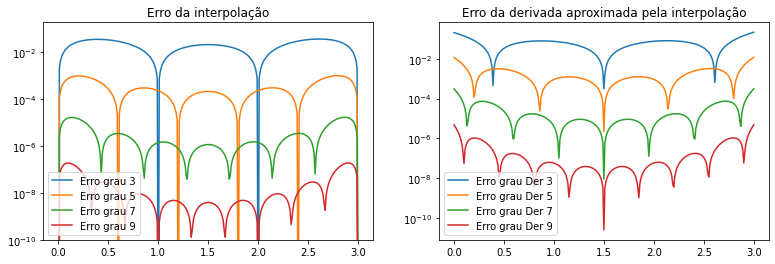

In [62]:
# YOUR CODE HERE
# YOUR CODE HERE
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

# YOUR CODE HERE
grau = [3, 5, 7, 9]
for i in grau:
    xs = np.linspace(0, 3, i+1)
    ys = np.sin(xs)

    CoefsInterpola = interp(xs, ys)
    CoefsInterpolaDerivado = derivada(CoefsInterpola)

    ts = np.arange(0, 3.01, 0.01)

    ValorSen = np.sin(ts)
    ValorInter = polyval(CoefsInterpola,ts)
    ax1.semilogy(ts, abs(ValorSen - ValorInter), label=f'Erro grau {i}')
    ax1.set_title('Erro da interpolação')
    ax1.legend()
    ax1.set_ylim(10e-11)

    ValorCos = np.cos(ts)
    ValorInterDer = polyval(CoefsInterpolaDerivado,ts)
    ax2.semilogy(ts, abs(ValorCos - ValorInterDer), label=f'Erro grau Der {i}')
    ax2.set_title('Erro da derivada aproximada pela interpolação')
    ax2.legend()
    

fig = plt.gcf()

In [63]:
assert len(fig.axes) == 2
for ax in fig.axes:
    assert len(ax.lines) == 4

In [64]:
fig = None

Comente as diferenças e similaridades com o caso anterior.
O que você acha que aconteceu?

A primeira diferença notável é a periodicidade perfeita dos polinômios de grau ímpar, e isso claramente se deve ao fato da função seno ser uma função par, e quando pegamos uma quantidade pares de pontos pra descreve-lâ ajuda a entender a função, diferente de quando pegamos uma quantidade ímpar de pontos. 
(Perceba que os polinômios de graus pares precisam de uma quantidade ímpar de pontos para interpolar o polinômio, enquanto os polinômios impares usam uma quantidade par.)



## Questão 4: Erros de regressão

Calcule a função seno em 31 pontos igualmente espaçados no intervalo $[0,3]$,
e use-os para ajustar os polinômios de regressão de graus 2, 4, 6 e 8.

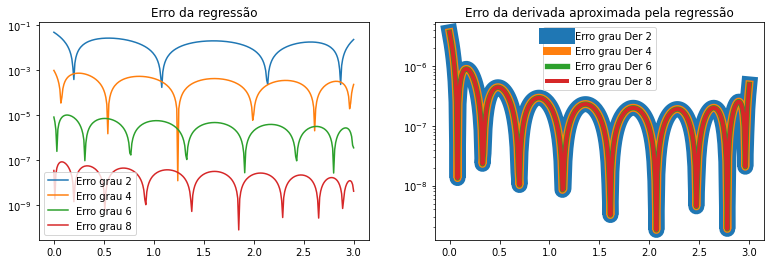

In [77]:

# YOUR CODE HERE
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

grau = [2, 4, 6, 8]
for i in grau:
    xs = np.linspace(0, 3, 31)
    ys = np.sin(xs)

    CoefsInterpola = regress(xs, ys, i)

    ts = np.arange(0, 3.01, 0.01)

    ValorSen = np.sin(ts)
    ValorInter = polyval(CoefsInterpola,ts)
    ax1.semilogy(ts, abs(ValorSen - ValorInter), label=f'Erro grau {i}')
    ax1.set_title('Erro da regressão')
    ax1.legend()

    ValorCos = np.cos(ts)
    ValorInterDer = polyval(CoefsInterpolaDerivado,ts)
    ax2.semilogy(ts, abs(ValorCos - ValorInterDer), label=f'Erro grau Der {i}', lw=32/i)
    ax2.set_title('Erro da derivada aproximada pela regressão')
    ax2.legend()
    

fig = plt.gcf()

In [ ]:
assert len(fig.axes) == 2
for ax in fig.axes:
    assert len(ax.lines) == 4

Compare os erros de ajuste da função (seno), entre este método e o uso dos polinômios interpoladores.

O erro da função em si é bem alto comparado com a interpolação de mesmo grau. A parte interessante também é notar que na grande parte do erro ele mantêm um valor constante, isso se deve ao fato de que a proposta da regressão é justamente minimizar o erro em todos os pontos.

Compare os erros de ajuste das derivadas.

O erro da derivada é bem interessante tendo em vista que ele é bem baixo, e também que ele independe do grau do polinômio de regressão. O que é uma total surpresa.

## Questão 5: Derivadas centrais

Qual seria o tamanho do passo necessário para calcular uma aproximação da derivada usando a derivada central,
de forma a obter um erro comparável com ajuste do polinômio de grau 2? E de grau 4?

Faça os cálculos abaixo, indicando **como você chegou nestes valores**.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Agora, faça o ajuste dos polinômios de grau 12, 14 e 16, por interpolação, no intervalo $[0,3]$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Qual a magnitude do erro que você obtém para a derivada, no intervalo $[0,3]$?

YOUR ANSWER HERE

Qual seria o passo no método das derivadas centrais para obter esse erro?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Comente

YOUR ANSWER HERE

# Parte 2: Interpolação com derivadas

Suponha que, além dos valores $y_i = f(x_i)$, também possuímos $z_i = f'(x_i)$.
Deveríamos ser capazes de calcular melhores polinômios interpoladores!

## Questão 6: Equações

Suponha que são dados apenas 2 pontos.
- Quais equações os coeficientes do polinômio devem satisfazer?
- Qual o grau deste polinômio?
- A matriz deste sistema é inversível?

YOUR ANSWER HERE

No caso geral, quais são as novas equações que os coeficientes $p_i$ devem satisfazer?

YOUR ANSWER HERE

Escreva a função `matrix_der(xs,d)` que calcula a matriz que multiplica estes coeficientes,
(nas novas equações)
em função dos pontos `xs` onde sabemos as derivadas e do grau `d` que o polinômio terá.

(Essa função é análoga à função que constrói a matriz para a interpolação e regressão)

In [ ]:
def matrix_der(xs, d):
    xs = np.asarray(xs, dtype=float)
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
M1 = matrix_der([1,2,3], 3)
ans = [[ 0.,  1.,  2.,  3.],
       [ 0.,  1.,  4., 12.],
       [ 0.,  1.,  6., 27.]]
assert np.allclose(M1, ans)

In [ ]:
M1 = matrix_der([1,2,3,4,5], 3)
assert np.shape(M1) == (5,4)

In [ ]:
M1 = matrix_der([1,2,3,4,5], 8)
assert np.shape(M1) == (5,9)

## Questão 7: Resolvendo o sistema

Para construir matrizes e vetores em "blocos", você pode usar `np.hstack`, `np.vstack` e/ou `np.block`.

In [ ]:
def interp1(xs, ys, zs):
    "Retorna os coeficientes do polinomio interpolador para os pontos  (xs, ys), com respectivas derivadas zs."
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
coefs = interp1([0], [1], [1])
assert np.allclose(coefs, [1,1])

In [ ]:
coefs = interp1([1], [1], [1])
assert np.allclose(coefs, [0,1])

Explique a resposta dos dois `assert`s acima (analiticamente)

YOUR ANSWER HERE

In [ ]:
coefs = interp1([0,1], [1,1], [1,1])
assert np.allclose(coefs, [1,1,-3,2])

In [ ]:
xs = np.array([0,1.0])
ys = np.array([1,3.0])
zs = np.array([1,1.0])
coefs = interp1(xs, ys, zs)
assert np.allclose(coefs, [1,1,3,-2])

Explique porque os coeficientes de grau 0 e 1 são os mesmos de só fazer a interpolação no zero.

YOUR ANSWER HERE

## Questão 8: Erro

O erro decai conforme aumentamos o número de pontos?
Teste para as funções $f(x) = \cos(x)$ e $g(x) = e^x$ no intervalo $[-1, 2]$.

In [ ]:
# Gráficos de erro para o cosseno
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.get_title()) >= 10
assert len(ax.lines) >= 5

In [ ]:
ax = None

In [ ]:
# Gráficos de erro para a função exponencial
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.get_title()) >= 10
assert len(ax.lines) >= 5

## Questão 9: Comparando

Há duas formas de obter um polinômio de grau 9 para interpolar a função cosseno:
- calcular a função em 10 pontos igualmente espaçados;
- calcular a função e sua derivada em 5 pontos igualmente espaçados.

Faça um gráfico dos erros, no interalo $[-1,2]$, para cada um destes polinômios.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Para termos uma medida quantitativa,
calcule a soma dos valores absolutos dos erros,
para vários pontos ao longo do intervalo $[-1,2]$

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Faça o mesmo estudo para polinômios de grau 7, 11 e 15.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

O que você observa?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Refaça para a função exponencial, com vários graus.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

O que você viu no caso do cosseno se mantém aqui?
Porque você acha que isso aconteceu?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()